In [204]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [205]:
df = pd.read_csv("draft_df_cleaned.csv", index_col=0)
cols_at_end = ['ROTY']
df = df[[c for c in df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df]]
df

,PLAYER,AFFILIATION,OVERALL PICK,TEAM,GP,MIN,PTS,FGM,FGA,FG%,...,BLK,PF,HEIGHT,WEIGHT,POSITION,CENTER,FORWARD,GUARD,ROOKIE,ROTY
0,Kwame Brown,Glynn Academy,1,WAS,57.0,14.3,4.5,1.6,4.3,38.7,...,0.5,1.8,2.11,132.0,Center,1,0,0,0,0.0
1,Pau Gasol,FC Barcelona Basquet (Spain),3,MEM,82.0,36.6,17.6,6.7,13.0,51.8,...,2.1,2.4,2.13,113.0,Center-Forward,1,1,0,0,1.0
2,Jason Richardson,Michigan State,5,GSW,80.0,32.8,14.4,5.8,13.6,42.6,...,0.4,2.4,1.98,102.0,Guard,0,0,1,0,0.0
3,Shane Battier,Duke,6,MEM,78.0,39.7,14.4,5.3,12.3,42.9,...,1.0,2.8,2.03,100.0,Forward,0,1,0,0,0.0
4,DeSagana Diop,Oak Hill Academy,8,CLE,18.0,6.1,1.4,0.7,1.6,41.4,...,0.6,1.1,2.13,127.0,Center,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,Kendall Brown,Baylor,48,Minnesota Timberwolves,34.0,27.1,9.7,3.9,6.6,58.4,...,0.4,2.3,2.03,93.0,Guard,0,0,1,1,NaN
867,Isaiah Mobley,Southern California,49,Cleveland Cavaliers,31.0,20.4,6.2,2.4,5.0,47.4,...,0.6,2.2,2.03,108.0,Forward,0,1,0,1,NaN
868,Tyrese Martin,Connecticut,51,Golden State Warriors,33.0,27.0,8.1,3.0,7.2,41.8,...,0.3,2.1,1.98,98.0,Guard,0,0,1,1,NaN
869,JD Davison,Alabama,53,Boston Celtics,33.0,25.8,8.5,3.0,6.5,46.3,...,0.4,1.2,1.91,88.0,Guard,0,0,1,1,NaN


In [206]:
df_1 = df[df['ROOKIE']==0]
df_1_quant = df_1.select_dtypes(include=np.number).drop("ROOKIE", axis=1)
df_1_quant

,OVERALL PICK,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,FTM,...,TOV,STL,BLK,PF,HEIGHT,WEIGHT,CENTER,FORWARD,GUARD,ROTY
0,1,57.0,14.3,4.5,1.6,4.3,38.7,0.0,0.0,1.2,...,0.8,0.3,0.5,1.8,2.11,132.0,1,0,0,0.0
1,3,82.0,36.6,17.6,6.7,13.0,51.8,0.0,0.1,4.1,...,2.7,0.5,2.1,2.4,2.13,113.0,1,1,0,1.0
2,5,80.0,32.8,14.4,5.8,13.6,42.6,1.0,3.1,1.8,...,2.0,1.3,0.4,2.4,1.98,102.0,0,0,1,0.0
3,6,78.0,39.7,14.4,5.3,12.3,42.9,1.3,3.5,2.5,...,2.0,1.6,1.0,2.8,2.03,100.0,0,1,0,0.0
4,8,18.0,6.1,1.4,0.7,1.6,41.4,0.0,0.0,0.1,...,0.7,0.1,0.6,1.1,2.13,127.0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,53,23.0,7.3,3.0,1.3,2.0,63.8,0.0,0.2,0.4,...,0.3,0.2,0.7,1.4,2.06,104.0,1,1,0,0.0
826,54,41.0,9.9,3.8,1.4,2.8,49.6,0.5,1.3,0.4,...,0.4,0.2,0.2,0.7,2.06,109.0,1,1,0,0.0
827,55,50.0,24.2,8.3,3.1,6.7,46.3,0.8,2.8,1.2,...,1.1,0.6,0.2,1.9,1.93,86.0,0,0,1,0.0
828,56,2.0,3.3,0.5,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.5,0.0,0.0,1.96,84.0,0,0,1,0.0


In [207]:
df_2 = df[df['ROOKIE'] == 1]
df_2_quant = df_2.select_dtypes(include=np.number).drop("ROOKIE", axis=1)

In [208]:
dataset = df_1_quant.values
X = dataset[:, :-1]
y = dataset[:, -1]

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (556, 25) (556,)
Test (274, 25) (274,)


In [210]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [211]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

fs_dict = {"Features":df_1_quant.drop("ROTY", axis=1).columns, "Feature Score" : fs.scores_}
fs_df = pd.DataFrame(data=fs_dict).sort_values(by='Feature Score', ascending=False)

Feature 0: 15.433906
Feature 1: 12.276459
Feature 2: 51.044793
Feature 3: 72.591383
Feature 4: 72.675978
Feature 5: 68.088400
Feature 6: 0.002758
Feature 7: 5.510208
Feature 8: 6.252532
Feature 9: 83.854987
Feature 10: 90.839796
Feature 11: 1.695137
Feature 12: 24.473957
Feature 13: 38.602286
Feature 14: 38.752019
Feature 15: 70.573039
Feature 16: 61.866860
Feature 17: 21.775648
Feature 18: 10.406565
Feature 19: 9.575668
Feature 20: 0.259303
Feature 21: 0.175844
Feature 22: 0.007016
Feature 23: 0.372503
Feature 24: 0.356377


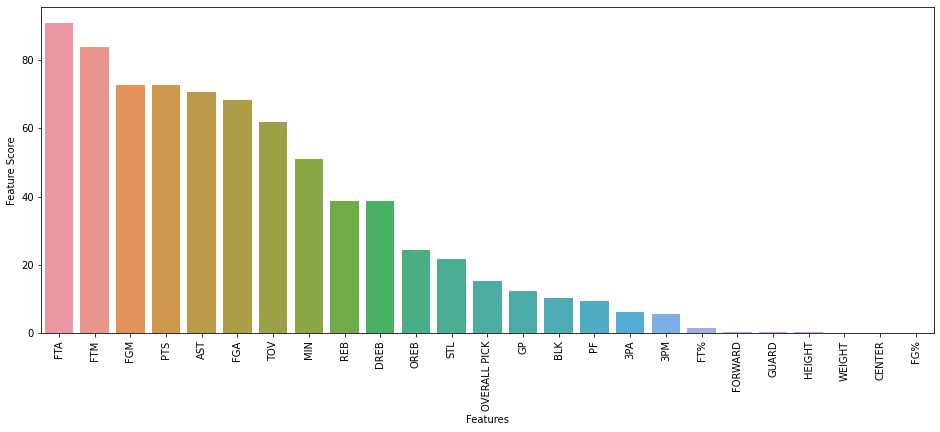

In [212]:
plt.figure(figsize=(16, 6))
bar = sns.barplot(x="Features", y="Feature Score", data=fs_df)
plt.xticks(rotation = 90)
plt.show()

In [216]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [217]:
y_hat = model.predict(X_test)

In [218]:
accuracy_score(y_test, y_hat) #high predicted accuracy due to small amount of rookie of the year winners

0.9781021897810219

In [219]:
y_hat2 = model.predict(X)

In [220]:
df_1['ROTY'] = y_hat2

C:\Users\asimp\AppData\Local\Temp/ipykernel_20472/2504518623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['ROTY'] = y_hat2


In [221]:
df_1

,PLAYER,AFFILIATION,OVERALL PICK,TEAM,GP,MIN,PTS,FGM,FGA,FG%,...,BLK,PF,HEIGHT,WEIGHT,POSITION,CENTER,FORWARD,GUARD,ROOKIE,ROTY
0,Kwame Brown,Glynn Academy,1,WAS,57.0,14.3,4.5,1.6,4.3,38.7,...,0.5,1.8,2.11,132.0,Center,1,0,0,0,0
1,Pau Gasol,FC Barcelona Basquet (Spain),3,MEM,82.0,36.6,17.6,6.7,13.0,51.8,...,2.1,2.4,2.13,113.0,Center-Forward,1,1,0,0,1
2,Jason Richardson,Michigan State,5,GSW,80.0,32.8,14.4,5.8,13.6,42.6,...,0.4,2.4,1.98,102.0,Guard,0,0,1,0,0
3,Shane Battier,Duke,6,MEM,78.0,39.7,14.4,5.3,12.3,42.9,...,1.0,2.8,2.03,100.0,Forward,0,1,0,0,0
4,DeSagana Diop,Oak Hill Academy,8,CLE,18.0,6.1,1.4,0.7,1.6,41.4,...,0.6,1.1,2.13,127.0,Center,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,Charles Bassey,Western Kentucky,53,PHI,23.0,7.3,3.0,1.3,2.0,63.8,...,0.7,1.4,2.06,104.0,Center-Forward,1,1,0,0,0
826,Sandro Mamukelashvili,Seton Hall,54,MIL,41.0,9.9,3.8,1.4,2.8,49.6,...,0.2,0.7,2.06,109.0,Forward-Center,1,1,0,0,0
827,Aaron Wiggins,Maryland,55,OKC,50.0,24.2,8.3,3.1,6.7,46.3,...,0.2,1.9,1.93,86.0,Guard,0,0,1,0,0
828,Scottie Lewis,Florida,56,CHA,2.0,3.3,0.5,0.0,0.0,0.0,...,0.0,0.0,1.96,84.0,Guard,0,0,1,0,0


In [229]:
df_TESTPRED.to_csv("ROTYTESTPRED.csv")

In [228]:
df_TESTPRED = pd.DataFrame(df_1['PLAYER'][df_1['ROTY']==1])
df_TESTPRED

,PLAYER
1,Pau Gasol
36,Amar'e Stoudemire
95,Emeka Okafor
156,Brandon Roy
226,Derrick Rose
268,Blake Griffin
273,Stephen Curry
391,Damian Lillard
438,Michael Carter-Williams
465,Andrew Wiggins


In [231]:
df_actual = pd.read_csv("roty.csv")
df_actual

,Season,Lg,Player,Voting,Age,Tm,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
0,2021-22,NBA,Scottie Barnes,(V),20,TOR,74,35.4,15.3,7.5,3.5,1.1,0.7,0.492,0.301,0.735,6.6,0.122,barnesc01
1,2020-21,NBA,LaMelo Ball,(V),19,CHO,51,28.8,15.7,5.9,6.1,1.6,0.4,0.436,0.352,0.758,2.8,0.093,ballla01
2,2019-20,NBA,Ja Morant,(V),20,MEM,67,31.0,17.8,3.9,7.3,0.9,0.3,0.477,0.335,0.776,3.8,0.088,moranja01
3,2018-19,NBA,Luka Dončić,(V),19,DAL,72,32.2,21.2,7.8,6.0,1.1,0.3,0.427,0.327,0.713,4.9,0.101,doncilu01
4,2017-18,NBA,Ben Simmons,(V),21,PHI,81,33.7,15.8,8.1,8.2,1.7,0.9,0.545,0.000,0.560,9.2,0.162,simmobe01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1951-52,NBA,Bill Tosheff (Tie) *,NaN,25,INO,65,31.6,9.4,3.3,3.4,NaN,NaN,0.327,NaN,0.824,2.9,0.068,toshebi01
75,1950-51,NBA,Paul Arizin *,NaN,22,PHW,65,NaN,17.2,9.8,2.1,NaN,NaN,0.407,NaN,0.793,13.7,NaN,arizipa01
76,1949-50,NBA,Alex Groza *,NaN,23,INO,64,NaN,23.4,NaN,2.5,NaN,NaN,0.478,NaN,0.729,17.9,NaN,grozaal01
77,1948-49,BAA,Howie Shannon *,NaN,25,PRO,55,NaN,13.4,NaN,2.3,NaN,NaN,0.364,NaN,0.804,3.4,NaN,shannho01


In [234]:
correct = 0
wrong = 0
pred_list = df_TESTPRED["PLAYER"].tolist()
actual_list = df_actual["Player"].tolist()
actual_list[3] = 'Luka Doncic'
for p in pred_list:
    if p in actual_list:
        correct +=1
    else:
        wrong +=1
print('correct:', correct)
print('wrong:',wrong) #the one wrong prediction was steph curry who finished second in mvp voting
                      #missed roty winners were typically in a competetive draft such as 2015-2016 and 2003-2004

correct: 14
wrong: 1
